# Étude de la distribution des formes verbales dans les paradigmes pour Lexique4

## Préparation des données
- lecture du fichier TSV
- préparation des graphiques Seaborn
- filtrage des éléments incohérents
- regroupement des doublons
- ajout d'une colonne pour les cases du paradigme (infover2Case)

<br/>
<br/>
<br/>
<br/>
<br/>
Liens :
- [Tri CF Début](#TriCF)
- [CF Stump & Finkel](#CF-StumpFinkel)
- [Heatmap CF](#CF-Mosaic)
- [Tri CF Fin](#TriCF)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from IPython.display import display,HTML
import pyperclip,re
import EspacesThematiques as ET
from EspacesThematiques import *

repFigs="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"

S Z N J ê ô â r E H O 6 9 2


In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
# sns.palplot(sns.color_palette("hls", 8))
# sns.palplot(sns.color_palette("husl", 8))

# Importation de Lexique4-Verbes

In [419]:
dfV=pd.read_csv("Lexique4-Verbes.tsv",sep="\t",encoding="utf8")
# dfV

In [420]:
# etCols=[c for et in etCells for c in et] #déplacé dans ET
dfCasesTokens=dfV.groupby(["case"])[["occurrences"]].sum().sort_values("occurrences",ascending=False)
tokenCols=dfCasesTokens.index.tolist()
dfCasesTypes=dfV.groupby(["case"])[["occurrences"]].count().sort_values("occurrences",ascending=False)
typeCols=dfCasesTypes.index.tolist()

In [421]:
exemplaireCases=set(dfV.case.unique())
nbCases=len(exemplaireCases)

In [422]:
dfVerbesNbCases=dfV[dfV.case!=""].groupby(["lexeme","case"])["occurrences"].count().groupby("lexeme").count().sort_values(ascending=False)
dfVerbesNbCases

lexeme
avoir            51
faire            50
devoir           50
mettre           49
savoir           49
être             48
prendre          48
connaître        47
venir            47
aller            47
entendre         47
voir             47
pouvoir          47
dire             47
devenir          47
donner           46
rester           46
trouver          46
envoyer          46
laisser          46
vouloir          46
croire           46
porter           45
manquer          45
aimer            45
apprendre        45
retirer          45
parler           45
passer           45
demander         45
                 ..
engainer          1
mâchurer          1
revacciner        1
mordorer          1
duplexer          1
enkyster          1
mitrer            1
dopa              1
entabler          1
enstérer          1
boyauter          1
bouturer          1
refortifier       1
boustifailler     1
doublonner        1
doucir            1
mithridatiser     1
dragonner         1
droper       

<a id='TriCF'></a>
# Tri des verbes en classes flexionnelles
<br/>
<br/>
<br/>
<br/>
<br/>
Liens :
- [Tri CF Début](#TriCF)
    - [Groupe 1](#Groupe1)
    - [Groupe 2](#Groupe2)
    - [Groupe 3](#Groupe3)
- [CF Stump & Finkel](#CF-StumpFinkel)
- [Heatmap CF](#CF-Heatmap)
- [Tri CF Fin](#TriCF)

<a id="Groupe1"></a>
### Tri des verbes en -er
- classes flexionnelles des exceptions
    - envoyer
    - aller
- classes flexionnelles phonologiques
    - CGer
    - uyer, oyer
    - ayer 

<br/>
Liens :
- [Tri CF Début](#TriCF)
    - [Groupe 1](#Groupe1)
    - [Groupe 2](#Groupe2)
    - [Groupe 3](#Groupe3)


In [423]:
cf={}
triCF="SF"
# triCF=""

G1=dfVerbesNbCases[dfVerbesNbCases.index.str[-2:]=="er"].index.tolist()
cf[u"envoyer"]=u"envoyer, renvoyer".split(", ")
G1.remove(u"envoyer")
G1.remove(u"renvoyer")
cf[u"aller"]=[u"aller"]
G1.remove(u"aller")
CGer=[]
for v in G1:
    m=re.search(ur"[bcdfghjklmnpqrstvwxz]ier$",v)
    if m:
        CGer.append(v)
    m=re.search(ur"[bcdfhjklmnprstvwxz]uer$",v)
    if m:
        CGer.append(v)
    else:
        m=re.search(ur"[bcdfghjklmnpqrstvwxz]ouer$",v)
        if m:
            CGer.append(v)
cf[u"écrouer"]=CGer
uyer=[v for v in G1 if v[-4:]==u"uyer"]
oyer=[v for v in G1 if v[-4:]==u"oyer"]
cf[u"appuyer"]=uyer+oyer
notG1=[v for c in cf for v in cf[c]]
notG1

[u'tuer',
 u'jouer',
 u'marier',
 u'continuer',
 u'oublier',
 u'appr\xe9cier',
 u'\xe9tudier',
 u'confier',
 u'prier',
 u'soucier',
 u'sacrifier',
 u'd\xe9fier',
 u'louer',
 u'v\xe9rifier',
 u'crier',
 u'lier',
 u'\xe9vacuer',
 u'supplier',
 u'\xe9chouer',
 u'publier',
 u'avouer',
 u'saluer',
 u'\xe9valuer',
 u'remercier',
 u'habituer',
 u'renier',
 u'associer',
 u'r\xe9concilier',
 u'fier',
 u'identifier',
 u'distribuer',
 u'n\xe9gocier',
 u'nier',
 u'secouer',
 u'remuer',
 u'm\xe9fier',
 u'contribuer',
 u'vouer',
 u'\xe9voluer',
 u'planifier',
 u'plier',
 u'parier',
 u'attribuer',
 u'r\xe9fugier',
 u'diminuer',
 u'chier',
 u'justifier',
 u'rejouer',
 u'exp\xe9dier',
 u'b\xe9n\xe9ficier',
 u'humilier',
 u'constituer',
 u'modifier',
 u'photographier',
 u'situer',
 u'effectuer',
 u'qualifier',
 u'envier',
 u'replier',
 u'clouer',
 u'remarier',
 u'copier',
 u'signifier',
 u'mendier',
 u'\xe9pier',
 u'relier',
 u'ruer',
 u'purifier',
 u'manier',
 u'suer',
 u'contrarier',
 u'multiplier',
 

In [424]:
cf[u"aimer"]=[v for v in G1 if v not in notG1]
cf[u"aimer"]

[u'donner',
 u'rester',
 u'trouver',
 u'laisser',
 u'porter',
 u'manquer',
 u'aimer',
 u'retirer',
 u'parler',
 u'passer',
 u'demander',
 u'arriver',
 u'penser',
 u'rencontrer',
 u'jeter',
 u'rentrer',
 u'regarder',
 u'appeler',
 u'acheter',
 u'gagner',
 u'poser',
 u'attirer',
 u'montrer',
 u'd\xe9cider',
 u'sauver',
 u'toucher',
 u'tirer',
 u'payer',
 u'abandonner',
 u'rappeler',
 u'commencer',
 u'embrasser',
 u'garder',
 u'essayer',
 u'entrer',
 u'retourner',
 u'retrouver',
 u'arr\xeater',
 u'chercher',
 u'emmener',
 u'\xe9couter',
 u'examiner',
 u'livrer',
 u'br\xfbler',
 u'tomber',
 u'coucher',
 u'd\xe9sirer',
 u'd\xe9tester',
 u'inqui\xe9ter',
 u'lever',
 u'emporter',
 u'amuser',
 u'ramener',
 u'raconter',
 u'r\xe9cup\xe9rer',
 u'amener',
 u'r\xe9veiller',
 u'accuser',
 u'attraper',
 u'surveiller',
 u'aider',
 u'refuser',
 u'accepter',
 u'approcher',
 u'annoncer',
 u'frapper',
 u'ignorer',
 u'apporter',
 u'entra\xeener',
 u'voler',
 u'discuter',
 u'souhaiter',
 u'serrer',
 u'\xe9c

<a id="Groupe2"></a>
#### Groupe 2
<br/>
Liens :
- [Tri CF Début](#TriCF)
    - [Groupe 1](#Groupe1)
    - [Groupe 2](#Groupe2)
    - [Groupe 3](#Groupe3)
    - [Non-classés](#Restant)


In [425]:
cf[u"finir"]=u"abasourdir, abâtardir, abêtir, abolir, abonnir, aboutir, abrutir, accomplir, accourcir, accroupir, adoucir, affadir, affaiblir, affermir, affranchir, agir, agonir, agrandir, aguerrir, ahurir, aigrir, alanguir, alentir, allégir, alourdir, alunir, amaigrir, amatir, amerrir, ameublir, amincir, amoindrir, amollir, amortir, amuïr, anéantir, anoblir, anordir, aplanir, aplatir, appauvrir, appesantir, applaudir, appointir, approfondir, arrondir, assagir, assainir, asservir, assombrir, assortir, assoupir, assouplir, assourdir, assouvir, assujettir, attendrir, atterrir, attiédir, avachir, avertir, aveulir, avilir, bannir, barrir, bâtir, bénir, blanchir, blêmir, blettir, bleuir, blondir, blottir, bondir, bonir, bonnir, bouffir, brandir, bruir, brunir, calmir, candir, catir, chancir, chérir, choisir, clapir, compatir, cônir, convertir, cotir, crépir, crônir, crounir, croupir, débâtir, débleuir, décatir, décrépir, définir, défléchir, défleurir, défraîchir, dégarnir, dégauchir, déglutir, dégourdir, dégrossir, déguerpir, déjaunir, démaigrir, démolir, démunir, dépérir, dépolir, déraidir, dérondir, dérougir, désassortir, désemplir, désengourdir, désenlaidir, désépaissir, désétablir, désinvestir, désobéir, dessaisir, dessertir, désunir, déverdir, dévernir, divertir, doucir, durcir, ébahir, ébaubir, ébaudir, éblouir, écatir, échampir, éclaircir, écrouir, effleurir, élargir, élégir, embellir, emboutir, embrunir, emplir, empuantir, enchérir, endolorir, endurcir, enforcir, enfouir, engloutir, engourdir, enhardir, enlaidir, ennoblir, enorgueillir, enrichir, ensevelir, envahir, envieillir, épaissir, épanouir, époutir, équarrir, esbaudir, estourbir, établir, étourdir, étrécir, évanouir, faiblir, farcir, finir, fléchir, flétrir, fleurir, forcir, fouir, fourbir, fournir, fraîchir, franchir, frémir, froidir, garantir, garnir, gauchir, gémir, glapir, grandir, gravir, grossir, guérir, havir, hennir, honnir, hourdir, impartir, infléchir, interagir, intervertir, invertir, investir, jaillir, jaunir, jouir, languir, lotir, louchir, maigrir, matir, maudire, mégir, meurtrir, mincir, moisir, moitir, mollir, mugir, munir, mûrir, nantir, noircir, nordir, nourrir, obéir, obscurcir, ourdir, pâlir, pâtir, périr, pervertir, pétrir, polir, pourrir, préétablir, prémunir, punir, rabonnir, rabougrir, raccourcir, racornir, radoucir, rafantir, raffermir, rafraîchir, ragaillardir, raidir, rajeunir, ralentir, ramollir, rancir, raplatir, rapointir, rappointir, rassortir, ravilir, ravir, réagir, réassortir, rebâtir, reblanchir, rebondir, rechampir, réchampir, reconvertir, recrépir, redéfinir, redémolir, réfléchir, refleurir, refroidir, regarnir, régir, regrossir, réinvestir, rejaillir, réjouir, rélargir, rembrunir, remplir, renchérir, renformir, répartir, repolir, resalir, resplendir, ressaisir, ressortir, ressurgir, resurgir, rétablir, retentir, rétrécir, rétroagir, réunir, réussir, reverdir, revernir, roidir, rondir, rosir, rôtir, rougir, rouir, roussir, roustir, rugir, saillir, saisir, salir, saurir, serfouir, sertir, sévir, sous-investir, subir, subvertir, superfinir, surenchérir, surfleurir, surgir, surinvestir, surir, tapir, tarir, tartir, ternir, terrir, tiédir, trahir, transir, travestir, unir, vagir, verdir, vernir, vieillir, vioquir, vomir, vrombir".split(", ")+[u"désaisir",u"antiréagir",u"surréagir",u"ragrandir",u"prédéfinir",u"rassir",u"revomir",u"préremplir"]+[u"cramoisir",u"gaudir",u"florir",u"glatir",u"bruire"]
cf[u"haïr"]=[u"haïr"]

<a id="Groupe3"></a>
#### Groupe 3
<br/>
Liens :
- [Tri CF Début](#TriCF)
    - [Groupe 1](#Groupe1)
    - [Groupe 2](#Groupe2)
    - [Groupe 3](#Groupe3)
    - [Non-classés](#Restant)


In [426]:
cf[u"être"]=[u"être"]
cf[u"avoir"]=[u"avoir"]
cf[u"falloir"]=[u"falloir"]
cf[u"asseoir"]=[u"asseoir",u"rasseoir"]
cf[u"pouvoir"]=[u"pouvoir"]
cf[u"mourir"]=[u"mourir"]
cf[u"savoir"]=[u"savoir"]
cf[u"vouloir"]=[u"vouloir"]+[u"revouloir"]
cf[u"seoir"]=[u"seoir"]+[u"messeoir"]
cf[u"surseoir"]=[u"surseoir"]
cf[u"occire"]=[u"occire"]
cf[u"ouïr"]=[u"ouïr"]
cf[u"férir"]=[u"férir"]
cf[u"gésir"]=[u"gésir"]
cf[u"chaloir"]=[u"chaloir"]
cf[u"ardre"]=[u"ardre"]
cf[u"sourdre"]=[u"sourdre"]
cf[u"comparoir"]=[u"comparoir"]
cf[u"chauvir"]=[u"chauvir"]
# cf[u""]=[u""]
cf[u"rendre"]=u"appendre, attendre, condescendre, confondre, contrefoutre, correspondre, corrompre, descendre, distendre, distordre, démordre, dépendre, détendre, détordre, entendre, fendre, fondre, foutre, interrompre, mordre, morfondre, mévendre, parfondre, pendre, perdre, pondre, pourfendre, prétendre, redescendre, refendre, refondre, remordre, rendre, rependre, reperdre, retendre, retondre, retordre, revendre, rompre, répandre, répondre, sous-entendre, sous-tendre, suspendre, tendre, tondre, tordre, vendre, épandre, étendre".split(", ")+[u"défendre",u"refoutre",u"réentendre",u"survendre",u"éperdre"]
cf[u"battre"]=u"abattre, battre, combattre, contrebattre, débattre, embattre, rabattre, rebattre, ébattre".split(", ")
cf[u"mettre"]=u"admettre, commettre, compromettre, démettre, émettre, entremettre, mettre, omettre, permettre, promettre, réadmettre, remettre, retransmettre, soumettre, transmettre".split(", ")+[u"réémettre"]
cf[u"peindre"]=u"dépeindre, peindre, repeindre, treindre, astreindre, étreindre, restreindre, atteindre, ceindre, ceindre, enceindre, empreindre, enfreindre, feindre, geindre, teindre, déteindre, éteindre, reteindre".split(", ")+[u"retreindre",u"rétreindre"]
cf[u"joindre"]=u"adjoindre, conjoindre, disjoindre, enjoindre, joindre, rejoindre, oindre, poindre".split(", ")
cf[u"traire"]=u"abstraire, distraire, extraire, retraire, soustraire, traire, braire".split(", ")+[u"rentraire"]
cf[u"plaire"]=u"plaire, complaire, déplaire, taire".split(", ")
cf[u"craindre"]=u"craindre, contraindre, plaindre".split(", ")
cf[u"vaincre"]=u"convaincre, vaincre".split(", ")
cf[u"croître"]=u"accroître, croître, décroître, recroître".split(", ")
cf[u"croire"]=u"accroire, croire".split(", ")+[u"mécroire"]
cf[u"boire"]=u"boire, emboire".split(", ")+[u"reboire"]
cf[u"clore"]=u"clore, déclore, éclore, enclore, forclore".split(", ")
cf[u"conclure"]=u"conclure, exclure".split(", ")
cf[u"inclure"]=u"inclure, occlure, reclure".split(", ")
cf[u"écrire"]=u"circonscrire, décrire, écrire, inscrire, prescrire, proscrire, récrire, réinscrire, retranscrire, souscrire, transcrire".split(", ")+[u"réécrire"]
cf[u"cuire"]=u"cuire, recuire, conduire, déduire, éconduire, enduire, induire, introduire, produire, reconduire, réduire, réintroduire, reproduire, retraduire, séduire, traduire, construire, détruire, instruire, reconstruire, luire, reluire, entre-nuire, nuire".split(", ")+[u"autodétruire",u"entre-détruire",u"surproduire",u"coproduire",u"déconstruire",u"décuire",u"méconduire"]
cf[u"connaître"]=u"connaître, connaître, méconnaître, reconnaître, paraître, apparaître, comparaître, disparaître, paraître, réapparaître, recomparaître, reparaître, transparaître".split(", ")
cf[u"prendre"]=u"apprendre, comprendre, déprendre, désapprendre, entreprendre, éprendre, méprendre, prendre, réapprendre, reprendre, surprendre".split(", ")+[u"rapprendre"]
cf[u"tenir"]=u"abstenir, appartenir, contenir, détenir, entretenir, maintenir, obtenir, retenir, soutenir, tenir, advenir, circonvenir, contrevenir, convenir, devenir, disconvenir, intervenir, obvenir, parvenir, prévenir, provenir, redevenir, ressouvenir, revenir, souvenir, subvenir, survenir, venir".split(", ")+[u"avenir"]
cf[u"sentir"]=u"consentir, démentir, départir, mentir, partir, pressentir, repartir, repentir, ressentir, ressortir, sentir, sortir".split(", ")
cf[u"acquérir"]=u"acquérir, conquérir, enquérir, quérir, reconquérir, requérir".split(", ")+[u"réacquérir"]
cf[u"vêtir"]=u"vêtir, revêtir, dévêtir".split(", ")
cf[u"couvrir"]=u"couvrir, découvrir, entrouvrir, offrir, ouvrir, recouvrir, rentrouvrir, rouvrir, souffrir".split(", ")+[u"redécouvrir",u"réouvrir"]
cf[u"cueillir"]=u"accueillir, cueillir, recueillir".split(", ")
cf[u"assaillir"]=u"assaillir, saillir, tressaillir".split(", ")
cf[u"faillir"]=u"défaillir, faillir".split(", ")
cf[u"bouillir"]=u"bouillir, débouillir".split(", ")
cf[u"dormir"]=u"dormir, endormir, rendormir".split(", ")+[u"redormir"]
cf[u"courir"]=u"accourir, concourir, courir, discourir, encourir, parcourir, recourir, secourir".split(", ")+[u"reparcourir"]
cf[u"servir"]=u"desservir, resservir, servir".split(", ")
cf[u"fuir"]=u"enfuir, fuir".split(", ")
cf[u"recevoir"]=u"apercevoir, concevoir, décevoir, percevoir, recevoir".split(", ")+[u"entrapercevoir",u"préconcevoir"]
cf[u"voir"]=u"entrevoir, prévoir, revoir, voir".split(", ")
cf[u"pourvoir"]=u"dépourvoir, pourvoir".split(", ")
cf[u"devoir"]=u"devoir, redevoir".split(", ")
cf[u"mouvoir"]=u"mouvoir, promouvoir, émouvoir".split(", ")
cf[u"pleuvoir"]=u"pleuvoir, repleuvoir".split(", ")
cf[u"valoir"]=u"prévaloir, revaloir, valoir, équivaloir".split(", ")
cf[u"choir"]=u"choir, déchoir, échoir".split(", ")
cf[u"faire"]=u"contrefaire, défaire, faire, forfaire, malfaire, méfaire, parfaire, redéfaire, refaire, satisfaire, surfaire".split(", ")+[u"stupéfaire"]
cf[u"naître"]=u"naître, renaître".split(", ")
cf[u"paître"]=u"paître, repaître".split(", ")
cf[u"absoudre"]=u"absoudre, dissoudre, résoudre".split(", ")
cf[u"coudre"]=u"coudre, découdre, recoudre".split(", ")
cf[u"moudre"]=u"moudre, remoudre, émoudre".split(", ")
cf[u"suivre"]=u"ensuivre, poursuivre, suivre".split(", ")
cf[u"vivre"]=u"revivre, survivre, vivre".split(", ")
cf[u"lire"]=u"lire, relire, réélire, élire".split(", ")
cf[u"dire"]=u"contredire, dire, dédire, interdire, médire, prédire, redire".split(", ")
cf[u"rire"]=u"rire, sourire".split(", ")
cf[u"confire"]=u"circoncire, confire, déconfire, frire, suffire".split(", ")

# cf[u""]=u"".split(", ")


<a id="CF-ListeVerbes"></a>
### Liste des verbes par CF
- liste prête à copier en LaTeX

In [427]:
descriptions={}
populations={}
for c in cf:
    populations[c]=len(cf[c])
#     print c, len(cf[c])
#     print ur"-----"
#     print ", ".join(cf[c])
#     print ur"====="
#     print
    descriptions[c]=[]
    descriptions[c].append(ur"\item "+c+" (%d)"%len(cf[c]))
    descriptions[c].append(ur"\begin{itemize}")
    descriptions[c].append(ur"\item "+", ".join(cf[c]))
    descriptions[c].append(ur"\end{itemize}")
lines=[]
for c in sorted(populations, key=lambda x:(populations[x]),reverse=True):
    lines.extend(descriptions[c])
pyperclip.copy("\n".join(lines))
# sortedCF

<a id="CF-StumpFinkel"></a>
# Stump & Finkel 2013 Classes

- trier les classes pour avoir les mêmes dans le même ordre que Stump & Finkel

<br/>
<br/>
<br/>
<br/>
<br/>
Liens :
- [Tri CF Début](#TriCF)
- [CF Stump & Finkel](#CF-StumpFinkel)
- [Heatmap CF](#CF-Heatmap)
- [Tri CF Fin](#TriCF)

In [428]:
#p236
ordreSF=u"couvrir mourir valoir être acquérir dormir vaincre vivre".split(" ")
ordreSF+=u"vouloir lire faire moudre rendre asseoir mettre croître".split(" ")
ordreSF+=u"plaire joindre peindre tenir prendre recevoir boire".split(" ")
ordreSF+=u"savoir avoir bouillir aller envoyer appuyer".split(" ")
#p237
ordreSF+=u"coudre écrire courir mouvoir pouvoir haïr naître".split(" ")
# Suppression de ASSEOIR2
# ordreSF+=u"connaître finir asseoir2 battre sentir servir suivre".split(" ")
ordreSF+=u"connaître finir battre sentir servir suivre".split(" ") 
ordreSF+=u"dire pourvoir inclure assaillir voir vêtir aimer".split(" ")
ordreSF+=u"cuire écrouer fuir rire conclure cueillir confire".split(" ")
len(ordreSF)
print " ".join(ordreSF)

couvrir mourir valoir être acquérir dormir vaincre vivre vouloir lire faire moudre rendre asseoir mettre croître plaire joindre peindre tenir prendre recevoir boire savoir avoir bouillir aller envoyer appuyer coudre écrire courir mouvoir pouvoir haïr naître connaître finir battre sentir servir suivre dire pourvoir inclure assaillir voir vêtir aimer cuire écrouer fuir rire conclure cueillir confire


In [429]:
cf[u"connaître"]+=cf[u"paître"]
del cf[u"paître"]
cf[u"peindre"]+=cf[u"craindre"]
del cf[u"craindre"]
cf[u"pourvoir"]+=cf[u"croire"]
del cf[u"croire"]
cf[u"recevoir"]+=cf[u"devoir"]
del cf[u"devoir"]
sortedCF=[c for c in sorted(populations, key=lambda x:(populations[x]),reverse=True) if c in cf]


In [430]:
print "missing SF"
for c in ordreSF:
    if not c in cf:
        print c
print "over CF"
for c in cf:
    if not c in ordreSF:
        print c

missing SF
over CF
chaloir
pleuvoir
seoir
ouïr
clore
surseoir
férir
traire
ardre
absoudre
gésir
faillir
occire
choir
sourdre
falloir
comparoir
chauvir


In [433]:
cf["bouillir"]

[u'bouillir', u'd\xe9bouillir']

### CF entièrement sans accord du participe passé
- être
- pouvoir
- rire
- faillir
- falloir

In [434]:
noPP=u"être pouvoir rire faillir falloir".split(" ")

<a id="Restant"></a>
### Lemmes restants dans Lexique4 sans CF
adire, appert, assis, connu, courre, disparu, divorcé, dopa, es, florissait, forfais, intima, parait, parfait, pris, raire, ravoir, reconnu, remis, rétaire, serons, sous-alimenté, antivêtir, tara
<br/>
Liens :
- [Tri CF Début](#TriCF)
    - [Groupe 1](#Groupe1)
    - [Groupe 2](#Groupe2)
    - [Groupe 3](#Groupe3)
    - [Non-classés](#Restant)


In [435]:
groupeVerbes=[v for c in cf for v in cf[c]]
print ", ".join([e for e in dfV[~dfV.lexeme.isin(groupeVerbes)].lexeme.unique().tolist() if isinstance(e,unicode)])

adire, appert, assis, connu, courre, disparu, divorcé, dopa, es, florissait, forfais, intima, parait, parfait, pris, raire, ravoir, reconnu, remis, rétaire, serons, sous-alimenté, antivêtir, tara


In [436]:
def trierVerbes(cfVerbe):
    verbes=cf[cfVerbe]
    result=dfV[dfV.lexeme.isin(verbes)].groupby("lexeme")["occurrences"].sum().sort_values(ascending=False).index.tolist()
    return result

if triCF:   #choix entre l'ordre StumpFinkel et l'ordre par défaut
    ordreCF=ordreSF
else:
    ordreCF=sortedCF
    
for cfVerbe in ordreCF:
    cf[cfVerbe]=trierVerbes(cfVerbe)

In [437]:
def getLexemeSet(lexeme):
    return set((dfV[dfV.lexeme.str.encode("utf8")==lexeme.encode("utf8")]).case.unique())

cfSet={}
cfSauts={}
cfDef={}

if triCF:   #choix entre l'ordre StumpFinkel et l'ordre par défaut
    ordreCF=ordreSF
else:
    ordreCF=sortedCF

for cfVerbe in ordreCF:
    exemplaireSet=set()
    exemplaires=cf[cfVerbe]
    iExSauts=[]
    for nL,l in enumerate(exemplaires):
        lCases=getLexemeSet(l)
        exemplaireSetTemp=exemplaireSet.union(lCases)
        if len(exemplaireSetTemp)>len(exemplaireSet):
            iExSauts.append(nL)
            print ",".join(sorted(list(exemplaireCases-exemplaireSetTemp))),nL,"\t%s"%l, len(lCases)
        exemplaireSet=exemplaireSetTemp
        if len(exemplaireSet)==nbCases:
            break
    cfSet[cfVerbe]=",".join(sorted(list(exemplaireCases-exemplaireSet)))
    cfSauts[cfVerbe]=iExSauts
    if cfVerbe in noPP:
        cfDef[cfVerbe]=len(exemplaireCases-exemplaireSet)-3 # les formes accordées du participe passé n'existent pas
    else:
        cfDef[cfVerbe]=len(exemplaireCases-exemplaireSet)
    sExSauts="nExemplaires=["+",".join([str(i) for i in iExSauts])+"]\n#%s : "%cfVerbe+", ".join([exemplaires[i] for i in iExSauts])
    print sExSauts
    print

ai1P,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,ps1S 0 	ouvrir 42
ai2P,is1P,is1S,is2P,is2S,is3P,ps1S 1 	découvrir 42
ai2P,is1P,is1S,is2P,is2S 2 	offrir 43
nExemplaires=[0,1,2]
#couvrir : ouvrir, découvrir, offrir

is1P,is1S,is2P,is2S,is3P,ps1P,ps2P 0 	mourir 44
nExemplaires=[0]
#mourir : mourir

ai1P,ai1S,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,ps1P,ps2P 0 	valoir 40
nExemplaires=[0]
#valoir : valoir

ppFP,ppFS,ppMP 0 	être 48
nExemplaires=[0]
#être : être

ai1P,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,is3S,pc1P,pc2P,pc2S,pc3P,ps1P,ps2P,ps3P 0 	conquérir 35
ai1P,ai2P,is1P,is1S,is2P,is2S,is3P,is3S,pc1P,pc2P,pc2S,ps1P,ps2P,ps3P 1 	requérir 31
ai2P,is1P,is1S,is2P,is2S,is3P,is3S,pc1P,pc2S,ps1P,ps2P,ps3P 4 	enquérir 17
nExemplaires=[0,1,4]
#acquérir : conquérir, requérir, enquérir

is1P,is1S,is2P,is2S,is3P,is3S,ppFP,ppFS,ppMP,ps1P,ps3P 0 	dormir 40
is1P,is1S,is2S,is3P,is3S,ppFP,ppFS,ps1P,ps3P 1 	endormir 39
nExemplaires=[0,1]
#dormir : dormir, endormir

ai1P,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,pc1P,ps1P,ps3P 0

ai1S,ai2S,is1P,is2P,is2S,is3S,ppFP,ppFS,ppMP,ps1P,ps3P 0 	rire 40
ai1S,is1P,is2P,ppFP,ppFS,ppMP,ps1P,ps3P 1 	sourire 39
nExemplaires=[0,1]
#rire : rire, sourire

ai1P,ai1S,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,is3S,ps1P,ps2P,ps3P 0 	conclure 38
nExemplaires=[0]
#conclure : conclure

ai1P,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,is3S,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S 0 	accueillir 36
ai1P,ai2P,ai2S,is1P,is1S,is2P,is2S,is3P,is3S,ps1P,ps1S,ps2P,ps3P,ps3S 2 	cueillir 35
nExemplaires=[0,2]
#cueillir : accueillir, cueillir

ai1P,ai1S,ai2P,ai2S,is1P,is2P,is2S,pc1P,pc2S,ppFP,ppFS,ps1P,ps2P,ps2S,ps3P 0 	suffire 36
ai1P,ai1S,ai2P,ai2S,is1P,is2P,is2S,pc1P,ppFP,ppFS,ps1P,ps2P,ps2S,ps3P 1 	frire 13
ai1P,ai1S,ai2P,ai2S,is1P,is2P,is2S,pc1P,ps1P,ps2P,ps2S,ps3P 2 	circoncire 14
nExemplaires=[0,1,2]
#confire : suffire, frire, circoncire



In [438]:
for c in sorted(cfDef, key=lambda x: cfDef[x]):
    print c,len([x for x in cfSet[c].split(",") if x!=""]),cfSet[c]
print
print cfSauts

aimer 0 
tenir 0 
avoir 0 
être 3 ppFP,ppFS,ppMP
pouvoir 4 pI2S,ppFP,ppFS,ppMP
mettre 1 ps1P
écrouer 1 is1P
sentir 1 is2P
faire 1 is2S
recevoir 1 ai2P
rendre 2 is1P,is2P
savoir 2 ai2P,is3P
finir 3 is1P,is2P,is2S
prendre 3 is1P,is2S,is3P
connaître 4 ai2P,is1P,is2S,ps1P
dire 4 ai1P,is1P,is2P,ps1P
aller 4 is1P,is3P,ps1P,ps2P
voir 4 is1P,is1S,is3P,ps1P
envoyer 5 is1P,is2P,is2S,is3P,is3S
couvrir 5 ai2P,is1P,is1S,is2P,is2S
rire 8 ai1S,is1P,is2P,ppFP,ppFS,ppMP,ps1P,ps3P
pourvoir 5 ai2P,is1P,is2P,is2S,is3P
vouloir 5 ai2P,is1P,is2P,is3P,ps1P
suivre 6 is1P,is1S,is2P,is2S,is3P,ps1P
battre 6 ai2P,is1P,is2P,is2S,is3P,ps2P
asseoir 7 ai2P,is1P,is2P,is3S,ps1P,ps2P,ps3P
cuire 7 ai2P,is1P,is1S,is2P,is2S,is3P,ps1P
peindre 7 ai2P,ai2S,is1P,is2P,is2S,is3S,ps1P
vivre 7 ai2P,is1P,is1S,is2P,is2S,is3P,ps1P
mourir 7 is1P,is1S,is2P,is2S,is3P,ps1P,ps2P
appuyer 8 ai2P,is1P,is1S,is2P,is2S,is3P,ps1P,ps3P
boire 8 ai2P,is1P,is2P,is3P,ppFP,ppFS,ps1P,ps2P
fuir 8 ai1S,ai2P,ai2S,is1P,is2P,pc1P,ps1P,ps3P
courir 8 ai2S,is1P

In [439]:
personnes=[p+n for n in "SP" for p in "123" ]
cases=[t+p for t in "pi ii fi pc ps ai is".split(" ") for p in personnes]
cases+="pI2S pI1P pI2P inf pP".split(" ")
cases+=["pp"+g+n for g in "MF" for n in "SP"]

In [440]:
def colorerXTicks(gAX,fSize=12,rot=45):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(cellColors[xtext])
        xlabel.set_family(["Linux Libertine O","monospace"])
        xlabel.set_size(fSize)
        xlabel.set_rotation(rot)

<a id="CF-Lexemes"></a>
#### Couverture d'une classe flexionnelle par les lexèmes

In [441]:
vbParadigmes=[]
cfVerbe=u"bouillir"
cfCouverture="Tot"

if cfCouverture=="Min":
    cfVerbes=[cf[cfVerbe][i] for i in cfSauts[cfVerbe]]
elif cfCouverture=="Tot":
    cfVerbes=cf[cfVerbe]

for v in cfVerbes:
#     print v
    cKnown={}
    cKnown[u"lexème"]=v
    knownCases=getLexemeSet(v)
    for mC in knownCases:
        cKnown[mC]=len(knownCases)+25
    vbParadigmes.append(cKnown)
# vbParadigmes

In [442]:
df=pd.DataFrame(vbParadigmes)
inCases=df.columns
outCases=list(set(cases)-set(inCases))
# df=df.reindex(columns=inCases+outCases)
df=pd.concat([df,pd.DataFrame(columns=outCases)],sort=False)
df=df[[u"lexème"]+cases].fillna(0).set_index(u"lexème")
df.index.names=["CF-"+cfVerbe]
h=len(df.index)
print h

2


ai1S 30
ai2P 34
ai2S 31
ai3P 35
fi1S 12
fi2P 16
fi2S 13
ii1P 9
ii2P 10
ii2S 7
is1P 39
is1S 36
is2P 40
is2S 37
is3S 38
pI2P 44
pc2P 22
pc3P 23
pc3S 20
pi1P 3
pi2P 4
ps1P 27
ps2P 28
ps2S 25
ps3P 29


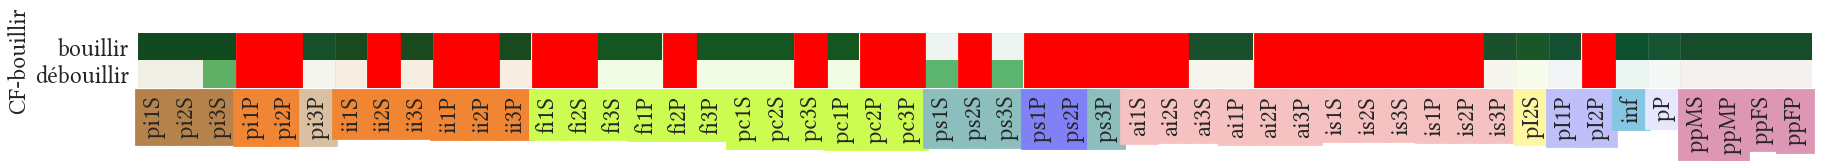

In [443]:
_, ax = plt.subplots(figsize=(30,h/float(2)))
ax=sns.heatmap(
                df,
#                 annot=True,
                ax=ax,
                cmap='Greens',
                cbar=False,
              )
colorerXTicks(ax,fSize=24,rot=90)
ylabels=ax.get_yticklabels()
ax.set_yticklabels(ylabels,size=24,
                   variant="small-caps",family=["Linux Libertine O","monospace"],
#                    rot=0,
                  )
ylabel=ax.get_ylabel()
ax.set_ylabel(ylabel,size=24,
                   variant="small-caps",family=["Linux Libertine O","monospace"],
#                    rot=0,
                  )
fig = plt.gcf()
etMap={
    3:cellColors["pi1S"],
    5:cellColors["pi1P"],
    6:cellColors["pi3P"],
    12:cellColors["ii1S"],
    24:cellColors["fi1S"],
    27:cellColors["ps1S"],
    29:cellColors["ps1P"],
    30:cellColors["ps3P"],
    42:cellColors["ai1S"],
    43:cellColors["pI2S"],
    45:cellColors["pI1P"],
    46:cellColors["inf"],
    47:cellColors["pP"],
    51:cellColors["ppMS"],
}
prevCol=0
rect={}
for l in [3,5,6,12,24,27,29,30,42,43,45,46,47,51]:
#     line=plt.Line2D((l,l),(0,h),color="k",alpha=0.5,linestyle=":")
#     fig.gca().add_artist(line)
    rect=plt.Rectangle((prevCol,0),l-prevCol,h,alpha=0.1,color=etMap[l])
    fig.gca().add_artist(rect)
    prevCol=l
for l in range(4,h,5):
    line=plt.Line2D((0,51),(l,l),color="k",alpha=0.5,linestyle="--")
    fig.gca().add_artist(line)

for l in [n for n,v in enumerate(df.index.tolist()) if v in noPP]:
    rect=plt.Rectangle((48,l),51,1,alpha=1,color="k")
    fig.gca().add_artist(rect)

for case in [mC for mC in cfSet[cfVerbe].split(",") if mC!=""]:
    l=cases.index(case)
    print case,l
    rect=plt.Rectangle((l,0),1,h,alpha=1,color="red")
    fig.gca().add_artist(rect)
    
    
display(HTML('<a id="CF-Heatmap-Verbes"></a>')) #bookmark for internal links

plt.savefig(repFigs+u'Lex4β-Heatmap-CF-%s-Couverture%s.pdf'%(cfVerbe,cfCouverture), dpi=300, bbox_inches="tight")

Liens :
- [Couverture d'une classe par ses verbes](#CF-Lexemes)

<a id="CF-Cases"></a>
#### Couverture des cases pour les classes flexionnelles dans Lexique4β

Dans *cfParadigme*, les cases contiennent :
- 0 si la case est couverte pour la case flexionnelle
- n si n cases sont inconnues pour la classe flexionnelle

Les lexèmes peuvent être triés par population de leurs paradigmes ou dans l'ordre défini par Stump & Finkel (2013) :
- triCF
    - "SF"
    - ""
    
Le tri est inclus dans le nom du fichier Heatmap exporté.

Les cases et les colonnes correspondantes sont colorées d'après l'espace thématique du français :
- cellColors définit la couleur de chaque case
- cellColors est importé de *EspacesThematiques.py*
- etMap donne les couleurs des colonnes

Toutes les 5 classes, on trace une ligne horizontale pour permettre de mieux repérer les correspondances.

La police choisie est celle du document LaTeX : *Linux Libertine O*



In [444]:
cfParadigme=[]

if triCF:   #choix entre l'ordre StumpFinkel et l'ordre par défaut
    ordreCF=ordreSF
else:
    ordreCF=sorted(cfDef, key=lambda x: cfDef[x])

for c in ordreCF:
    print c
    cMissing={}
    cMissing["cf"]=c
    missingCases=[mC for mC in cfSet[c].split(",") if mC!=""]
    for mC in missingCases:
        cMissing[mC]=len(missingCases)+25
    cfParadigme.append(cMissing)

couvrir
mourir
valoir
être
acquérir
dormir
vaincre
vivre
vouloir
lire
faire
moudre
rendre
asseoir
mettre
croître
plaire
joindre
peindre
tenir
prendre
recevoir
boire
savoir
avoir
bouillir
aller
envoyer
appuyer
coudre
écrire
courir
mouvoir
pouvoir
haïr
naître
connaître
finir
battre
sentir
servir
suivre
dire
pourvoir
inclure
assaillir
voir
vêtir
aimer
cuire
écrouer
fuir
rire
conclure
cueillir
confire


In [445]:
df=pd.DataFrame(cfParadigme)
inCases=df.columns
outCases=list(set(cases)-set(inCases))
# df=df.reindex(columns=inCases+outCases)
df=pd.concat([df,pd.DataFrame(columns=outCases)],sort=False)
df=df[["cf"]+cases].fillna(0).set_index("cf")
h=len(df.index)

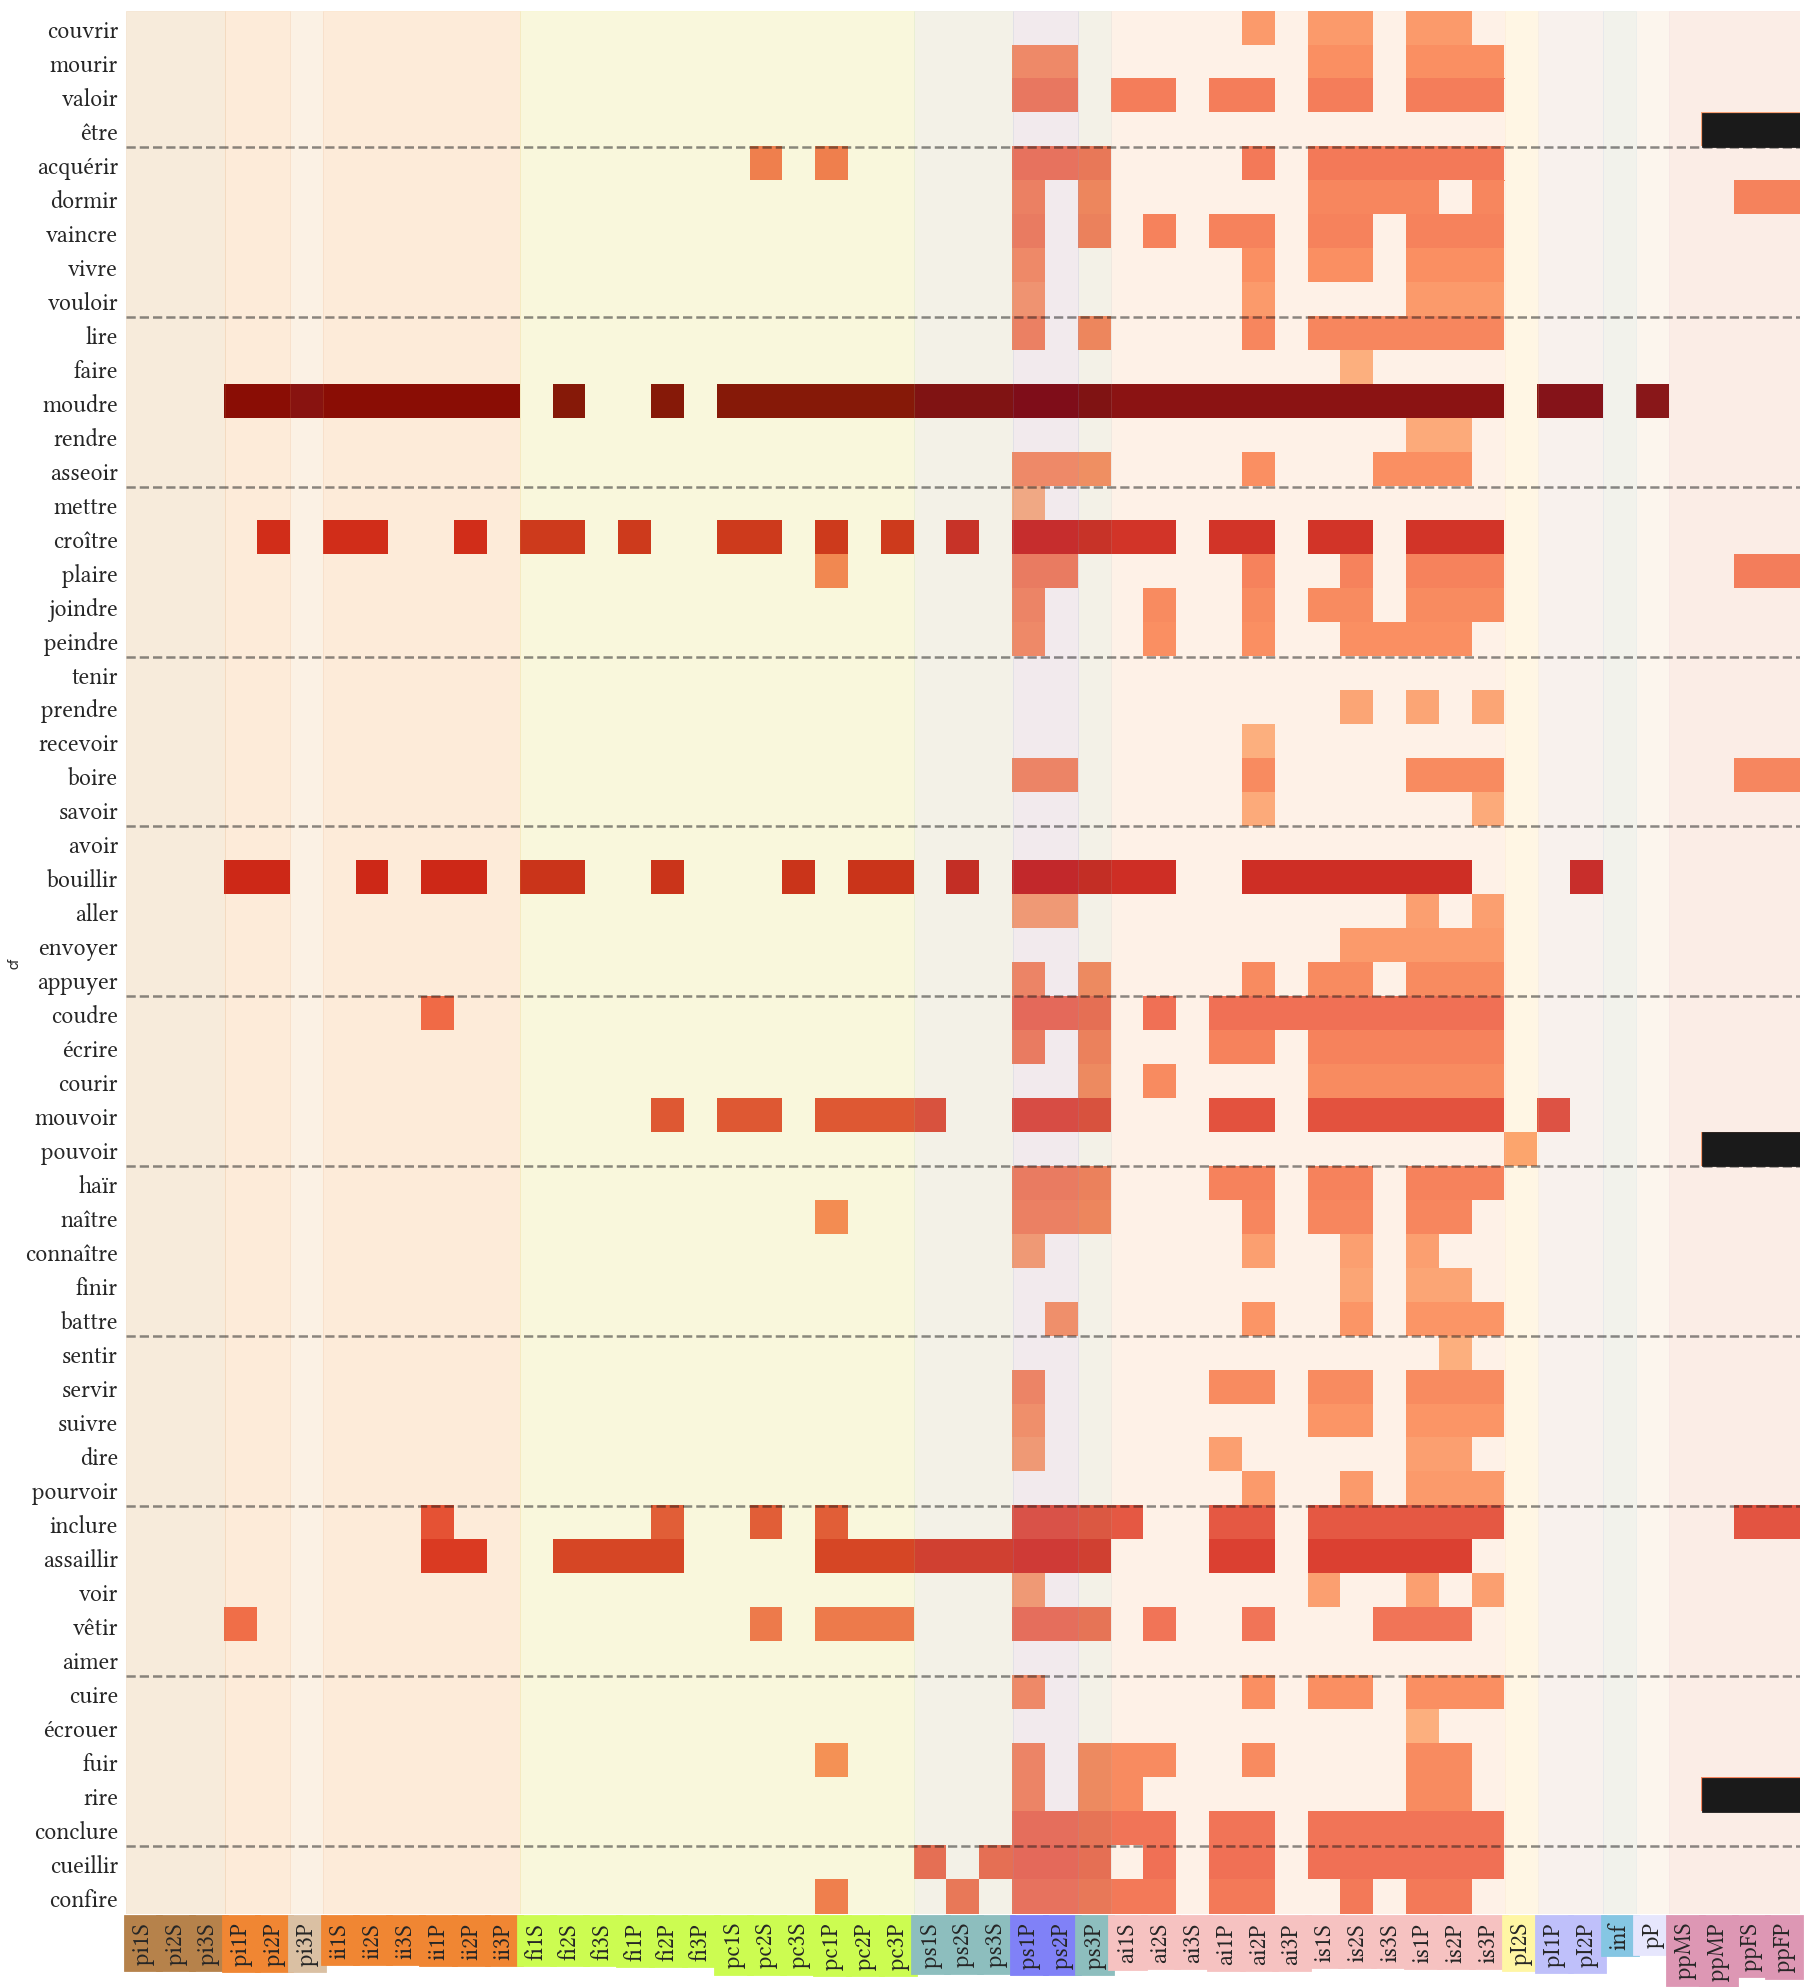

In [446]:
_, ax = plt.subplots(figsize=(30,35))
ax=sns.heatmap(
                df,
#                 annot=True,
                ax=ax,
                cmap='OrRd',
                cbar=False,
              )
colorerXTicks(ax,fSize=24,rot=90)
ylabels=ax.get_yticklabels()
ax.set_yticklabels(ylabels,size=24,variant="small-caps",family=["Linux Libertine O","monospace"])
fig = plt.gcf()
etMap={
    3:cellColors["pi1S"],
    5:cellColors["pi1P"],
    6:cellColors["pi3P"],
    12:cellColors["ii1S"],
    24:cellColors["fi1S"],
    27:cellColors["ps1S"],
    29:cellColors["ps1P"],
    30:cellColors["ps3P"],
    42:cellColors["ai1S"],
    43:cellColors["pI2S"],
    45:cellColors["pI1P"],
    46:cellColors["inf"],
    47:cellColors["pP"],
    51:cellColors["ppMS"],
}
prevCol=0
rect={}
for l in [3,5,6,12,24,27,29,30,42,43,45,46,47,51]:
#     line=plt.Line2D((l,l),(0,h),color="k",alpha=0.5,linestyle=":")
#     fig.gca().add_artist(line)
    rect=plt.Rectangle((prevCol,0),l-prevCol,h,alpha=0.1,color=etMap[l])
    fig.gca().add_artist(rect)
    prevCol=l
for l in range(4,h,5):
    line=plt.Line2D((0,51),(l,l),color="k",alpha=0.5,linestyle="--")
    fig.gca().add_artist(line)

for l in [n for n,v in enumerate(df.index.tolist()) if v in noPP]:
    rect=plt.Rectangle((48,l),51,1,alpha=1,color="k")
    fig.gca().add_artist(rect)

    
display(HTML('<a id="CF-Heatmap"></a>')) #bookmark for internal links

plt.savefig(repFigs+u'Lex4β-Heatmap-ClassesFlexionnelles%s-Couverture.pdf'%triCF, dpi=300, bbox_inches="tight")

<a id='CF-Heatmap'></a>
# CF Heatmap
Un tableau de la couverture maximale des classes flexionnelles
<br/>
<br/>
<br/>
<br/>
<br/>
Liens :
- [Tri CF Début](#TriCF)
- [CF Stump & Finkel](#CF-StumpFinkel)
- [Heatmap CF](#CF-Heatmap)
- [Tri CF Fin](#TriCF)

# Couverture des plats de Stump & Finkel 2013

In [4]:
casesStemsSF={
 'pi1S':1,
 'pi2S':2,
 'pi3S':2,
 'pi1P':3,
 'pi2P':4,
 'pi3P':5,
 'ii1S':6,
 'ii2S':6,
 'ii3S':6,
 'ii1P':7,
 'ii2P':7,
 'ii3P':6,
 'fi1S':10,
 'fi2S':10,
 'fi3S':10,
 'fi1P':10,
 'fi2P':10,
 'fi3P':10,
 'pc1S':10,
 'pc2S':10,
 'pc3S':10,
 'pc1P':10,
 'pc2P':10,
 'pc3P':10,
 'ps1S':11,
 'ps2S':11,
 'ps3S':11,
 'ps1P':12,
 'ps2P':12,
 'ps3P':11,
 'ai1S':8,
 'ai2S':9,
 'ai3S':9,
 'ai1P':9,
 'ai2P':9,
 'ai3P':8,
 'is1S':9,
 'is2S':9,
 'is3S':9,
 'is1P':9,
 'is2P':9,
 'is3P':9,
 'pI2S':13,
 'pI1P':14,
 'pI2P':15,
 'inf':16,
 'pP':17,
 'ppMS':18,
 'ppMP':18,
 'ppFS':19,
 'ppFP':19
            }


In [5]:
stemsSF2013.columns=range(1,11)+["10a"]+range(11,20)
stemsSF=stemsSF2013[range(1,20)]
stemsSF=stemsSF.rename(index={'ASSEOIR1': 'ASSEOIR'})
stemsSF

NameError: name 'stemsSF2013' is not defined

In [449]:
def getStemsSF(verbe):
    result=[]
    for case in cases: 
        if df.loc[verbe.lower(),case]==0:
            nStemSF=casesStemsSF[case]
            result.append(nStemSF)
    return result

In [450]:
def getPlat(verbe):
    if verbe.upper() in stemsSF.index:
        return stemsSF.loc[verbe.upper()].to_dict()
    else:
        print "Verbe absent de SF",v
        return None

In [451]:
def setPlatLine(v):
    stemsV=getStemsSF(v)
    platV=getPlat(v)
    if platV:
        result=[ur"\textsc{%s}"%v]
        for k in platV:
            if k in stemsV:
                result.append(ur"\cellcolor{green}"+platV[k])
            else:
                result.append(platV[k])
        return " & ".join(result)+ur" \\"
    else:
        return
        

In [452]:
latexLines=[]
for v in df.index:
    platLine=setPlatLine(v)
    if platLine:
        latexLines.append(platLine)

In [453]:
pyperclip.copy("\n".join(latexLines))

# Morphomes de Boyé & Schalchli 2019

<a id="CF-OMP"></a>
#### Couverture du paradigme morphomique optimal par les lexèmes

In [ ]:
casesOmpBS={
 'pi2S':"pi3S",
 'ii1S':"ii3S",
 'ii2S':"ii3S",
 'ii3P':"ii3S",
 'fi1S':"fi2P",
 'fi2S':"fi3S",
 'fi3P':"fi1P",
 'pc1S':"pc3S",
 'pc2S':"pc3S",
 'pc3P':"pc3S",
 'ps1S':"ps3S",
 'ps2S':"ps3S",
 'ps3P':"ps3S",
 'ai2S':"ai3S",
 'is1S':"is2S",
 'is3S':"ai3S",
 'is3P':"is2S",
 'ppMP':"ppMS",
 'ppFP':"ppFS"
            }
for case in cases:
    if case not in casesOmpBS : casesOmpBS[case]=case

In [517]:
%store casesOmpBS

Stored 'casesOmpBS' (dict)


In [514]:
omParadigmes=[]
cfVerbe=u"choir"
cfVerbes=cf[cfVerbe]

for v in cfVerbes:
    print v
    cKnown={}
    cKnown[u"lexème"]=v
    mKnown=set()
    knownCases=getLexemeSet(v)
    for mC in knownCases:
        mKnown.add(casesOmpBS[mC])
    print v, len(mKnown)
    for mM in mKnown:
        cKnown[mM]=len(mKnown)+25
    omParadigmes.append(cKnown)
omParadigmes

choir
choir 9
déchoir
déchoir 6
échoir
échoir 5


[{'ai1S': 34,
  'ai3S': 34,
  'fi2P': 34,
  'inf': 34,
  u'lex\xe8me': u'choir',
  'pI2S': 34,
  'pi1S': 34,
  'pi3S': 34,
  'ppFS': 34,
  'ppMS': 34},
 {'inf': 31,
  u'lex\xe8me': u'd\xe9choir',
  'pc3S': 31,
  'pi3P': 31,
  'pi3S': 31,
  'ppFS': 31,
  'ppMS': 31},
 {'ai3S': 30,
  'inf': 30,
  u'lex\xe8me': u'\xe9choir',
  'pi3S': 30,
  'ppFS': 30,
  'ppMS': 30}]

In [515]:
df=pd.DataFrame(omParadigmes)
# ompCols=df.columns.tolist()

inCases=df.columns
outCases=list(set(casesOmpBS)-set(inCases))
# df=df.reindex(columns=inCases+outCases)
df=pd.concat([df,pd.DataFrame(columns=outCases)],sort=False)


ompColsSort=[u"lexème"]+cases
ompColsSort

ompCols.sort(key=lambda x: ompColsSort.index(x))
ompCols

df=df[ompCols]
df.set_index(u"lexème")

df=df.fillna(0).set_index(u"lexème")
df.index.names=["CF-"+cfVerbe]
h=len(df.index)
w=len(df.columns)
print h,w


3 30


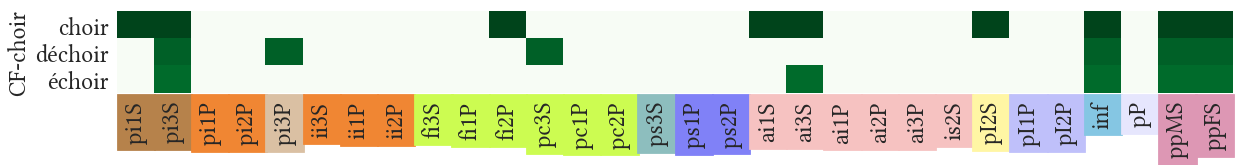

In [516]:
_, ax = plt.subplots(figsize=(w/float(1.5),h/float(2)))
ax=sns.heatmap(
                df,
#                 annot=True,
                ax=ax,
                cmap='Greens',
                cbar=False,
              )
colorerXTicks(ax,fSize=24,rot=90)
ylabels=ax.get_yticklabels()
ax.set_yticklabels(ylabels,size=24,
                   variant="small-caps",family=["Linux Libertine O","monospace"],
#                    rot=0,
                  )
ylabel=ax.get_ylabel()
ax.set_ylabel(ylabel,size=24,
                   variant="small-caps",family=["Linux Libertine O","monospace"],
#                    rot=0,
                  )
fig = plt.gcf()

plt.savefig(repFigs+u'Lex4β-Heatmap-OMP-%s-Couverture%s.pdf'%(cfVerbe,cfCouverture), dpi=300, bbox_inches="tight")